**Problem 1**

Analysts are required to explore data and reflect on the insights. Clear writing skill is an integral part of a good report. Note that the explanations must be such that readers with minimum knowledge of analytics is able to grasp the insight.

Austo Motor Company is a leading car manufacturer specializing in SUV, Sedan, and Hatchback models. In its recent board meeting, concerns were raised by the members on the efficiency of the marketing campaign currently being used. The board decides to rope in an analytics professional to improve the existing campaign.

Objective-

They want to analyze the data to get a fair idea about the demand of customers which will help them in enhancing their customer experience. Suppose you are a Data Scientist at the company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

Problem 1 - a).Data Overview


---




- Import the libraries - Load the data - Check the structure of the data - Check the types of the data - Check for and treat (if needed) missing values - Check the statistical summary - Check for and treat (if needed) data irregularities - Observations and Insights

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
url = 'https://raw.githubusercontent.com/adityasharan045/python-data-books/main/austo_automobile.csv'
DF1 = pd.read_csv(url,index_col=0)
#df = pd.read_csv(url)

print(DF1.head(5))

     Gender Profession Marital_status      Education  No_of_Dependents  \
Age                                                                      
53     Male   Business        Married  Post Graduate                 4   
53    Femal   Salaried        Married  Post Graduate                 4   
53   Female   Salaried        Married  Post Graduate                 3   
53   Female   Salaried        Married       Graduate                 2   
53     Male   Salaried        Married  Post Graduate                 3   

    Personal_loan House_loan Partner_working  Salary  Partner_salary  \
Age                                                                    
53             No         No             Yes   99300         70700.0   
53            Yes         No             Yes   95500         70300.0   
53             No         No             Yes   97300         60700.0   
53            Yes         No             Yes   72500         70300.0   
53             No         No             Yes   79

In [51]:
import pandas as pd

url = 'https://raw.githubusercontent.com/adityasharan045/python-data-books/main/godigt_cc_data.xlsx'
DF2 = pd.read_excel(url,index_col=0)
#df = pd.read_excel(url)

print(DF2.head(5))


                    card_no  card_bin_no Issuer   card_type card_source_date  \
userid                                                                         
1       4384 39XX XXXX XXXX       438439   Visa        edge       2019-09-29   
2       4377 48XX XXXX XXXX       437748   Visa  prosperity       2002-10-30   
3       4377 48XX XXXX XXXX       437748   Visa     rewards       2013-10-05   
4       4258 06XX XXXX XXXX       425806   Visa   indianoil       1999-06-01   
5       4377 48XX XXXX XXXX       437748   Visa        edge       2006-06-13   

       high_networth  active_30  active_60  active_90  cc_active30  ...  \
userid                                                              ...   
1                  B          0          1          1            0  ...   
2                  A          1          1          1            0  ...   
3                  C          0          0          0            0  ...   
4                  E          0          1          1           

In [52]:
DF1.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1581 entries, 53 to 22
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            1528 non-null   object 
 1   Profession        1581 non-null   object 
 2   Marital_status    1581 non-null   object 
 3   Education         1581 non-null   object 
 4   No_of_Dependents  1581 non-null   int64  
 5   Personal_loan     1581 non-null   object 
 6   House_loan        1581 non-null   object 
 7   Partner_working   1581 non-null   object 
 8   Salary            1581 non-null   int64  
 9   Partner_salary    1475 non-null   float64
 10  Total_salary      1581 non-null   int64  
 11  Price             1581 non-null   int64  
 12  Make              1581 non-null   object 
dtypes: float64(1), int64(4), object(8)
memory usage: 172.9+ KB


In [53]:
DF1.describe().T

,count,mean,std,min,25%,50%,75%,max
No_of_Dependents,1581.0,2.457938,0.943483,0.0,2.0,2.0,3.0,4.0
Salary,1581.0,60392.220114,14674.825044,30000.0,51900.0,59500.0,71800.0,99300.0
Partner_salary,1475.0,20225.559322,19573.149277,0.0,0.0,25600.0,38300.0,80500.0
Total_salary,1581.0,79625.996205,25545.857768,30000.0,60500.0,78000.0,95900.0,171000.0
Price,1581.0,35597.722960,13633.636545,18000.0,25000.0,31000.0,47000.0,70000.0


There seems to be missing data in two columns "Gender" and "Partner_salary".

In [54]:
DF1.describe(include='all')

,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
count,1528,1581,1581,1581,1581.000000,1581,1581,1581,1581.000000,1475.000000,1581.000000,1581.000000,1581
unique,4,2,2,2,NaN,2,2,2,NaN,NaN,NaN,NaN,3
top,Male,Salaried,Married,Post Graduate,NaN,Yes,No,Yes,NaN,NaN,NaN,NaN,Sedan
freq,1199,896,1443,985,NaN,792,1054,868,NaN,NaN,NaN,NaN,702
mean,NaN,NaN,NaN,NaN,2.457938,NaN,NaN,NaN,60392.220114,20225.559322,79625.996205,35597.722960,NaN
std,NaN,NaN,NaN,NaN,0.943483,NaN,NaN,NaN,14674.825044,19573.149277,25545.857768,13633.636545,NaN
min,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,30000.000000,0.000000,30000.000000,18000.000000,NaN
25%,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,51900.000000,0.000000,60500.000000,25000.000000,NaN
50%,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,59500.000000,25600.000000,78000.000000,31000.000000,NaN
75%,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,71800.000000,38300.000000,95900.000000,47000.000000,NaN


In [55]:
print('No. of Rows:',DF1.shape[0])
print('No. of Columns:',DF1.shape[1])

No. of Rows: 1581
No. of Columns: 13


In [56]:
DF1.head()

,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
Age,,,,,,,,,,,,,
53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV


In [57]:
DF1.tail()

,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
Age,,,,,,,,,,,,,
22,Male,Salaried,Single,Graduate,2,No,Yes,No,33300,0.0,33300,27000,Hatchback
22,Male,Business,Married,Graduate,4,No,No,No,32000,NaN,32000,31000,Hatchback
22,Male,Business,Single,Graduate,2,No,Yes,No,32900,0.0,32900,30000,Hatchback
22,Male,Business,Married,Graduate,3,Yes,Yes,No,32200,NaN,32200,24000,Hatchback
22,Male,Salaried,Married,Graduate,4,No,No,No,31600,0.0,31600,31000,Hatchback


In [58]:
DF1.isnull().sum()
# it shows null values in two features "Gender" and "Partner_salary"-

Gender               53
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

Data type seems to match with Index Name type, there will be no special character to be replace.

In [59]:
#Now lets chech unique data of object type variable-
print(DF1['Profession'].value_counts())
print('\n')
print(DF1['Marital_status'].value_counts())
print('\n')
print(DF1['Education'].value_counts())
print('\n')
print(DF1['Make'].value_counts())
print('\n')
print(DF1['Gender'].value_counts())
print('\n')

Salaried    896
Business    685
Name: Profession, dtype: int64


Married    1443
Single      138
Name: Marital_status, dtype: int64


Post Graduate    985
Graduate         596
Name: Education, dtype: int64


Sedan        702
Hatchback    582
SUV          297
Name: Make, dtype: int64


Male      1199
Female     327
Femal        1
Femle        1
Name: Gender, dtype: int64




In [60]:
#since the "Female" is the value taken 327 times, we will assume the value as  more True and replace the others with it-
DF1['Gender']


Age
53      Male
53     Femal
53    Female
53    Female
53      Male
       ...  
22      Male
22      Male
22      Male
22      Male
22      Male
Name: Gender, Length: 1581, dtype: object

In [61]:
DF1['Gender'].replace('Femal','Female',inplace=True)
DF1['Gender'].replace('Femle','Female',inplace=True)
DF1['Gender'].replace(np.nan, inplace=True)
print(DF1['Gender'].value_counts())
DF1['Gender'].unique()


Male      1244
Female     337
Name: Gender, dtype: int64


array(['Male', 'Female'], dtype=object)

In [62]:
DF1['Gender']=DF1['Gender'].fillna(DF1['Gender'].mode()[0])

In [63]:
DF1['Partner_salary'].unique()

array([70700., 70300., 60700., 60200., 60500., 50800., 40400.,     0.,
       70600., 60600., 60300., 45500., 40200., 40700.,   600.,   700.,
       27800., 70000., 40100., 40900., 27000.,    nan, 40500., 50400.,
       80400., 60900., 60100., 70200., 30000., 40300., 40800., 70800.,
         900., 45000., 40600., 50700., 80500., 27700., 35800., 26600.,
       60000., 27900., 60800., 40000., 70100., 38100., 38200., 30200.,
       38500., 50900., 35100., 38700., 38300., 38900., 23200., 24700.,
       30800., 28100., 38400., 38000., 23100., 30100., 25700., 70400.,
         200., 30900., 26100., 45700.,   400., 28200., 70900., 38800.,
       45200., 26800., 60400., 30300., 25800.,   800., 38600., 24500.,
       30700., 28500., 24900., 70500., 35900., 30500., 28900., 27200.,
       45900., 25300., 35600., 25000., 25200., 26300., 35700., 23800.,
       32700., 30600., 45600., 28000., 32600., 28600., 25100., 26700.,
       24200., 25900., 22100., 25400., 28400., 28300., 25500., 24000.,
      

In [64]:
DF1['Partner_salary'].replace(np.nan, inplace=True)
DF1['Partner_salary'].unique()

array([70700., 70300., 60700., 60200., 60500., 50800., 40400.,     0.,
       70600., 60600., 60300., 45500., 40200., 40700.,   600.,   700.,
       27800., 70000., 40100., 40900., 27000., 40500., 50400., 80400.,
       60900., 60100., 70200., 30000., 40300., 40800., 70800.,   900.,
       45000., 40600., 50700., 80500., 27700., 35800., 26600., 60000.,
       27900., 60800., 40000., 70100., 38100., 38200., 30200., 38500.,
       50900., 35100., 38700., 38300., 38900., 23200., 24700., 30800.,
       28100., 38400., 38000., 23100., 30100., 25700., 70400.,   200.,
       30900., 26100., 45700.,   400., 28200., 70900., 38800., 45200.,
       26800., 60400., 30300., 25800.,   800., 38600., 24500., 30700.,
       28500., 24900., 70500., 35900., 30500., 28900., 27200., 45900.,
       25300., 35600., 25000., 25200., 26300., 35700., 23800., 32700.,
       30600., 45600., 28000., 32600., 28600., 25100., 26700., 24200.,
       25900., 22100., 25400., 28400., 28300., 25500., 24000., 32400.,
      

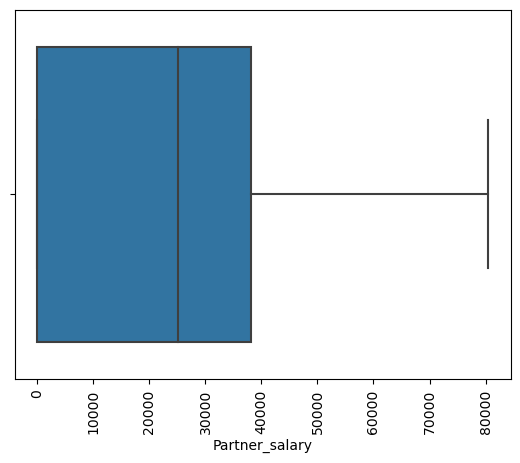

In [65]:
sns.boxplot(DF1, x='Partner_salary')
plt.xticks(rotation=90)
plt.show()

As we can see above, there is no outliers so will replace the null values with mean.

In [66]:
DF1.loc[(DF1['Partner_working'] == 'Yes'), 'Partner_salary'] =DF1['Total_salary']-DF1['Salary']
DF1.loc[(DF1['Partner_working'] == 'No'), 'Partner_salary'] =0

C:\Users\adity\AppData\Local\Temp\ipykernel_20440\3177618507.py:1: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  DF1.loc[(DF1['Partner_working'] == 'Yes'), 'Partner_salary'] =DF1['Total_salary']-DF1['Salary']


ValueError: cannot reindex on an axis with duplicate labels

In [ ]:
DF1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1581 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1581 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.0+ KB


In [ ]:
DF1['Gender'].value_counts()

Male      1244
Female     337
Name: Gender, dtype: int64

In [ ]:
DF1.isnull().sum()

Age                 0
Gender              0
Profession          0
Marital_status      0
Education           0
No_of_Dependents    0
Personal_loan       0
House_loan          0
Partner_working     0
Salary              0
Partner_salary      0
Total_salary        0
Price               0
Make                0
dtype: int64

In [ ]:
dups=DF1.duplicated()
dups.sum()

0

In [ ]:
DF1.skew()

<ipython-input-436-56c4f7854d50>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  DF1.skew()


Age                 0.893087
No_of_Dependents   -0.129808
Salary             -0.011571
Partner_salary      0.441069
Total_salary        0.609706
Price               0.740874
dtype: float64

Problem 1 -b).Univariate Analysis-

---


- - Explore all the variables (categorical and numerical) in the data - Check for and treat (if needed) outliers - Observations and Insights

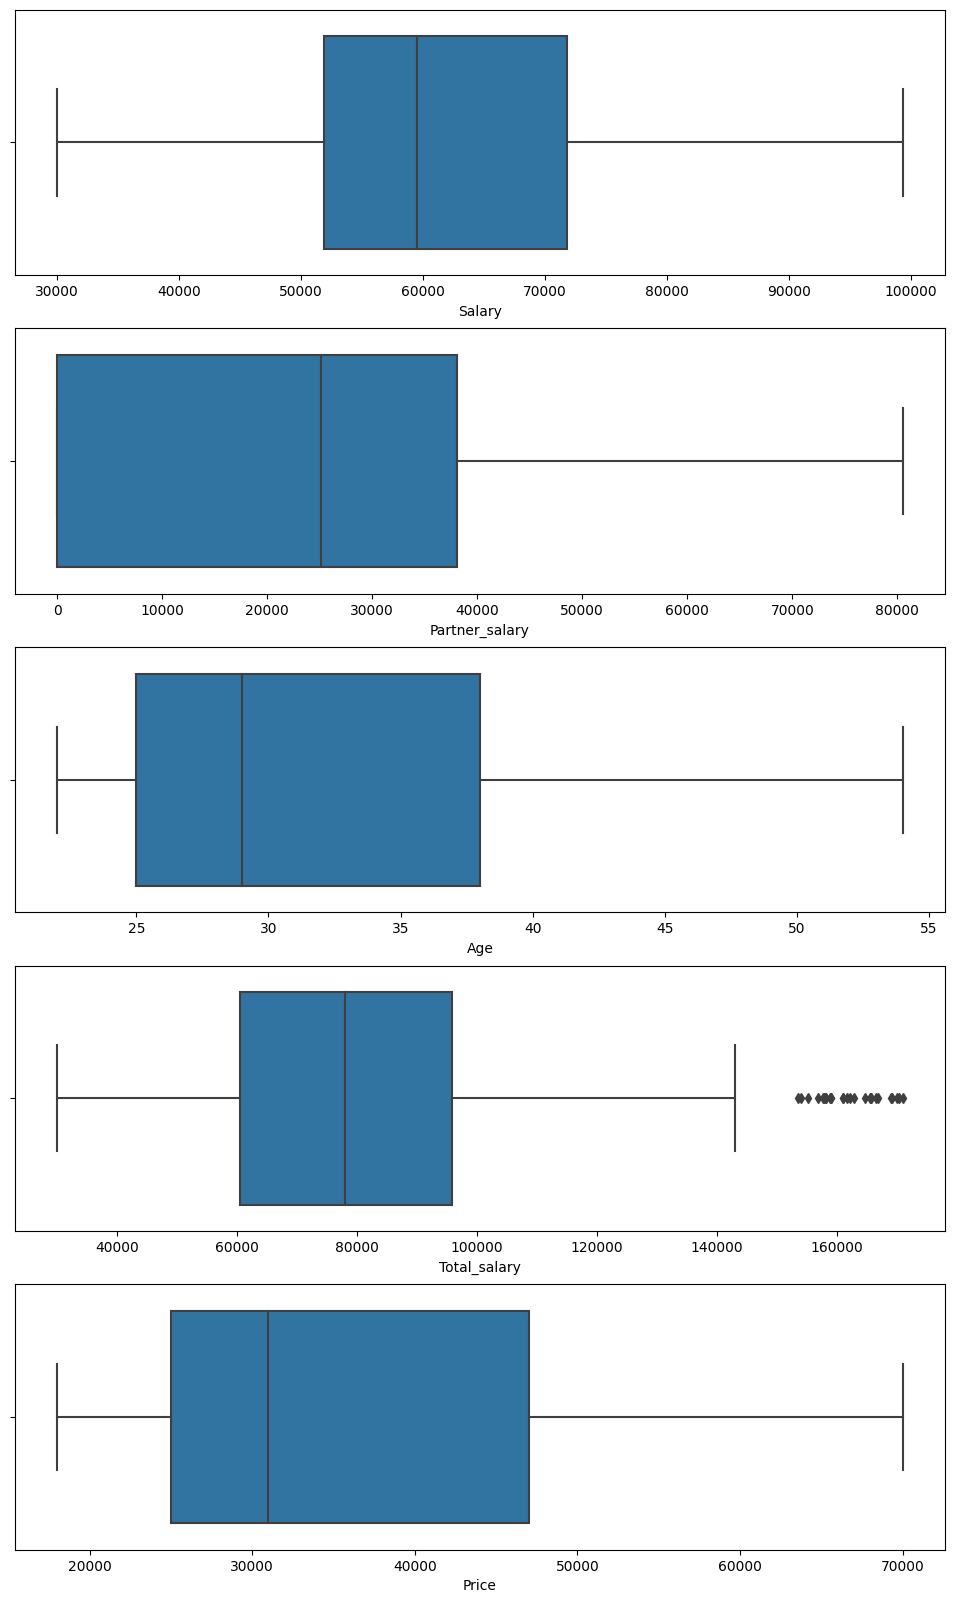

In [ ]:
fig, axes = plt.subplots(nrows = 5);
fig.set_size_inches(12,20)
sns.boxplot(data = DF1, x = 'Salary', ax=axes[0]);
sns.boxplot(data = DF1, x = 'Partner_salary', ax=axes[1]);
sns.boxplot(data = DF1, x = 'Age', ax = axes[2]);
sns.boxplot(data = DF1, x = 'Total_salary', ax = axes[3]);
sns.boxplot(data = DF1, x = 'Price', ax = axes[4]);

In [ ]:
#In above otliers are detected in ''Total Salary''-
Max_value=95900+(1.5*(95900-60500))
outliers=DF1['Total_salary']> Max_value
outliers.value_counts()

False    1554
True       27
Name: Total_salary, dtype: int64

In [ ]:
def remove_outliers(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range, upper_range
range1,range2 = remove_outliers(DF1['Total_salary'])
DF1['Total_salary']=np.where(DF1['Total_salary']>range2,range2,DF1['Total_salary'])

count      1581.000000
mean      79398.545225
std       24849.147996
min       30000.000000
25%       60500.000000
50%       78000.000000
75%       95900.000000
max      149000.000000
Name: Total_salary, dtype: float64


<Axes: xlabel='Total_salary'>

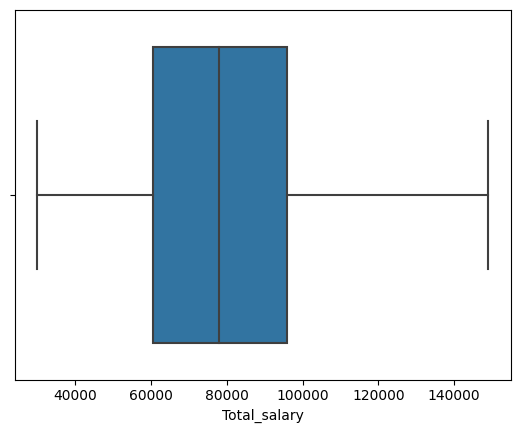

In [ ]:
print(DF1['Total_salary'].describe().T)
('/n')
sns.boxplot(data = DF1, x = 'Total_salary')


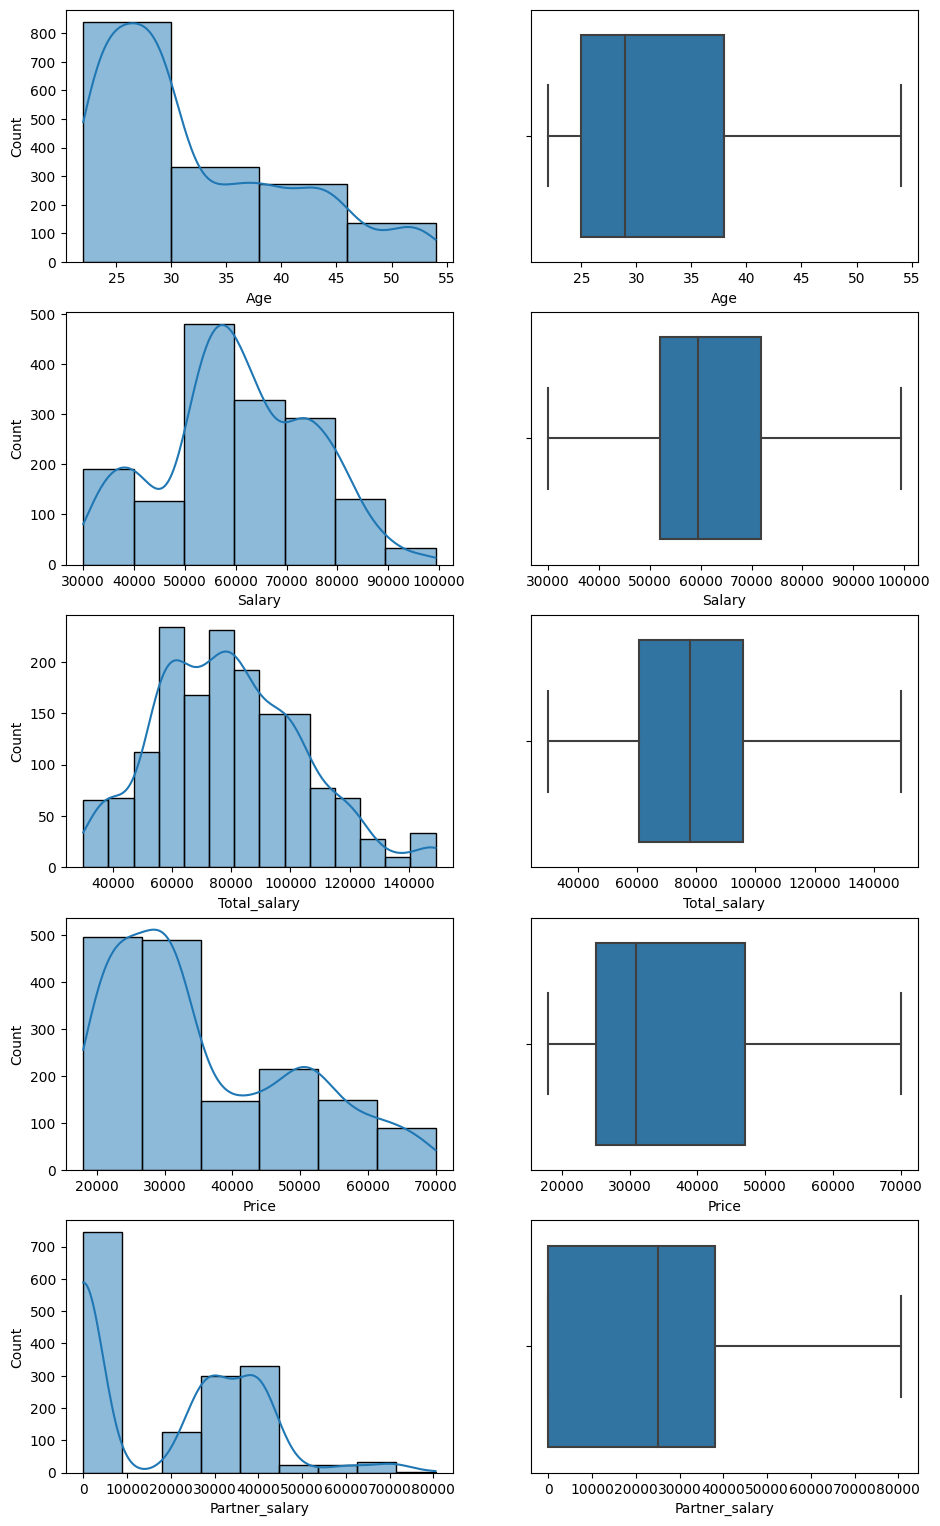

In [ ]:
fig, axes = plt.subplots(nrows = 5, ncols = 2)
fig.set_size_inches(11,19)
sns.histplot(DF1['Age'], bins = 4, kde = True, ax = axes[0][0])
sns.boxplot(data = DF1, x = 'Age', ax = axes[0][1])
sns.histplot(DF1['Salary'], bins = 7, kde = True, ax = axes[1][0])
sns.boxplot(data = DF1, x = 'Salary', ax = axes[1][1])
sns.histplot(DF1['Total_salary'], bins = 14, kde = True, ax = axes[2][0])
sns.boxplot(data = DF1, x = 'Total_salary', ax = axes[2][1])
sns.histplot(DF1['Price'], bins = 6, kde = True, ax = axes[3][0])
sns.boxplot(data = DF1, x = 'Price', ax = axes[3][1])
sns.histplot(DF1['Partner_salary'], bins = 9, kde = True, ax = axes[4][0])
sns.boxplot(data = DF1, x = 'Partner_salary', ax = axes[4][1])
plt.show()

As we can see above the outliers are treated.

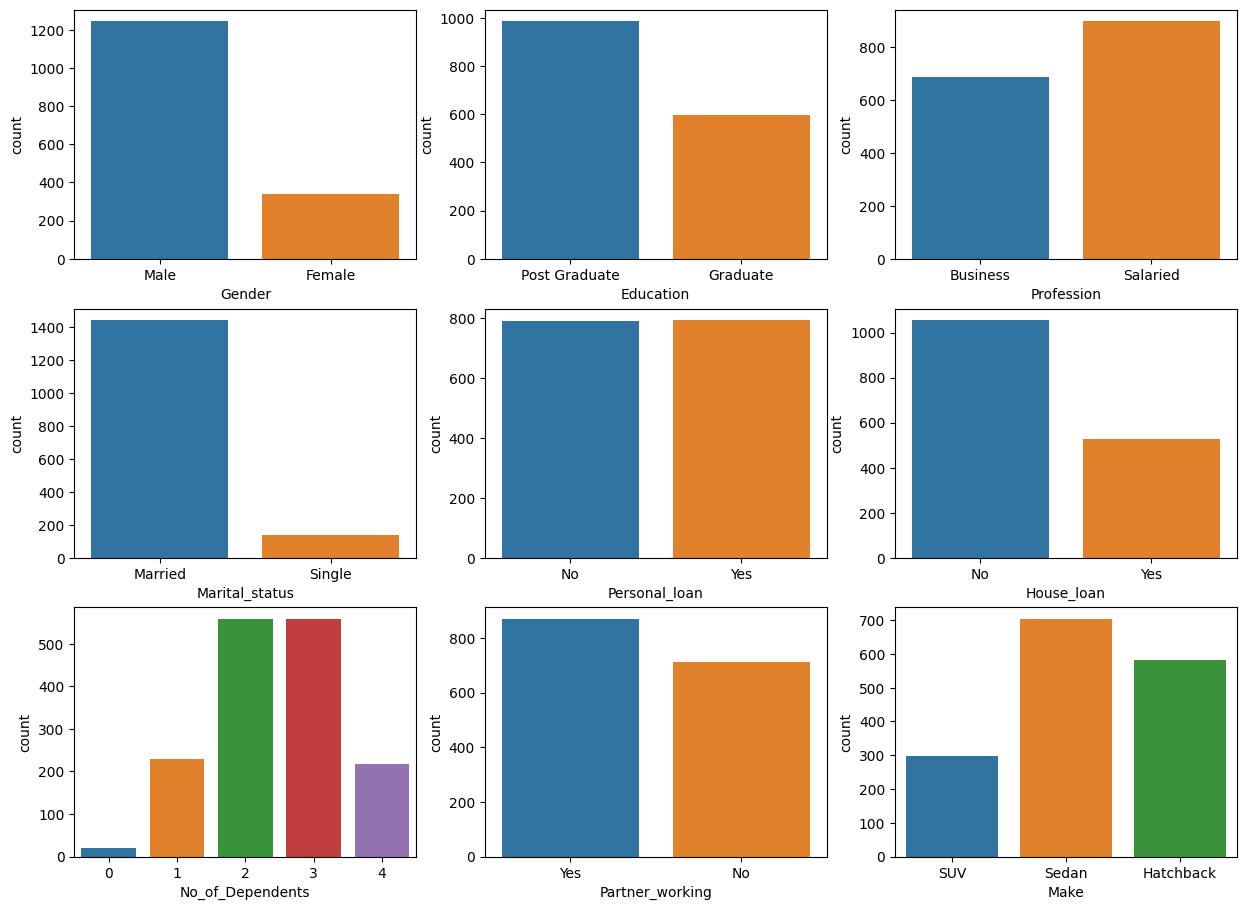

In [ ]:
fig, axes = plt.subplots(nrows = 3, ncols = 3)
fig.set_size_inches(15,11)
sns.countplot(DF1, x = 'Gender', ax= axes[0][0])
sns.countplot(DF1, x = 'Education', ax = axes[0][1])
sns.countplot(DF1, x = 'Profession', ax = axes[0][2])
sns.countplot(DF1, x = 'Marital_status', ax = axes[1][0])
sns.countplot(DF1, x = 'Personal_loan', ax = axes[1][1])
sns.countplot(DF1, x = 'House_loan', ax = axes[1][2])
sns.countplot(DF1, x = 'No_of_Dependents', ax = axes[2][0])
sns.countplot(DF1, x = 'Partner_working', ax = axes[2][1])
sns.countplot(DF1, x = 'Make', ax = axes[2][2])
plt.show()

Problem 1 - c).Bivariate Analysis-

Explore the relationship between all numerical variables - Explore the correlation between all numerical variables - Explore the relationship between categorical vs numerical variables

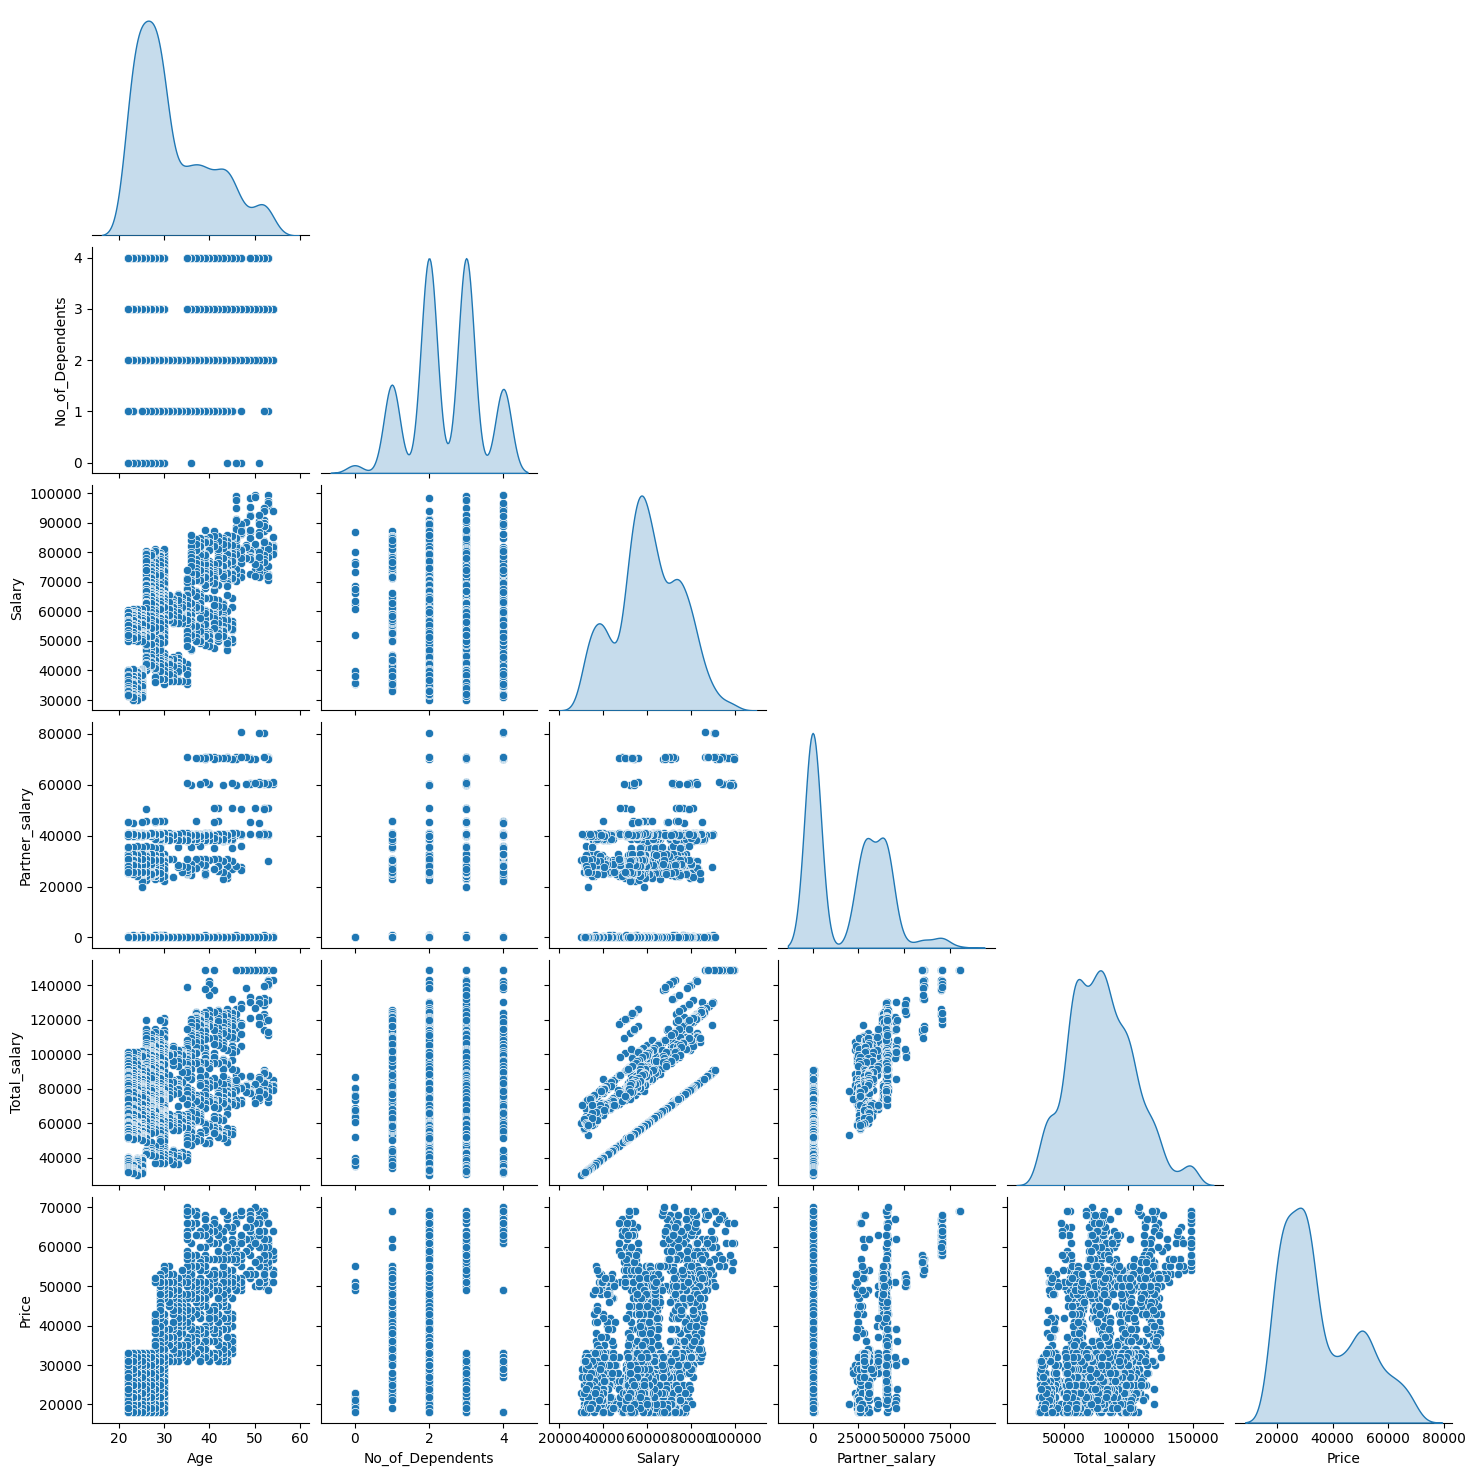

In [ ]:
sns.pairplot(DF1, vars = ['Age', 'No_of_Dependents', 'Salary', 'Partner_salary', 'Total_salary', 'Price'], corner = True, diag_kind = 'kde')
plt.show()

<ipython-input-444-31780579760f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(DF1.corr() , dtype=bool))


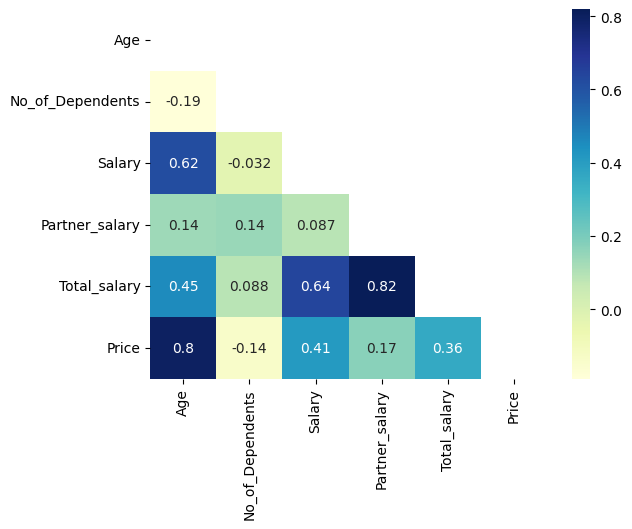

In [ ]:
mask = np.triu(np.ones_like(DF1.corr() , dtype=bool))
sns.heatmap(DF1[['Age', 'No_of_Dependents', 'Salary', 'Partner_salary', 'Total_salary', 'Price']].corr(), mask=mask, annot = True, cmap = 'YlGnBu')
plt.show();

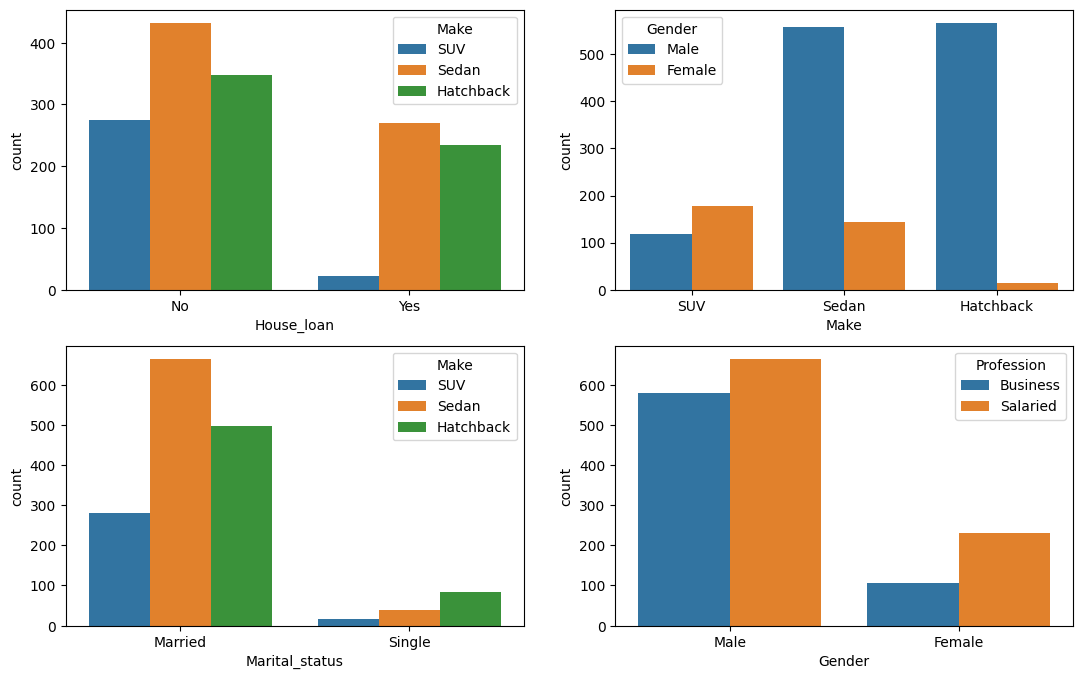

In [ ]:
fig, axes = plt.subplots(nrows = 2, ncols = 2)
fig.set_size_inches(13,8)
sns.countplot(DF1, x = 'House_loan', hue = 'Make', ax = axes[0][0])
sns.countplot(DF1, x = 'Make', hue = 'Gender', ax = axes[0][1])
sns.countplot(DF1, x = 'Marital_status', hue = 'Make', ax = axes[1][0])
sns.countplot(DF1, x = 'Gender', hue = 'Profession', ax = axes[1][1])
plt.show()

Problem 1 -d).Key Questions-

Explore the data to answer the following key questions:

In [ ]:
df_male= DF1[(DF1['Gender']=='Male')]
df_female= DF1[(DF1['Gender']=='Female')]
df_sala= DF1[(DF1['Profession']=='Salaried')]
df_busi= DF1[(DF1['Profession']=='Business')]
df_sedan= DF1[(DF1['Make']=='Sedan')]
df_suv= DF1[(DF1['Make']=='SUV')]
df_hatch= DF1[(DF1['Make']=='Hatchback')]
Male_count=df_male['Make'].value_counts()['SUV']
Female_count=df_female['Make'].value_counts()['SUV']

1. Do men tend to prefer SUVs more compared to women?

In [ ]:
print('No. of men preferd Suv are',Male_count)
print('No. of women prefered Suv are',Female_count)

No. of men preferd Suv are 119
No. of women prefered Suv are 178


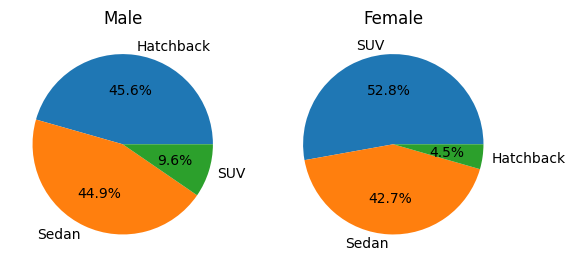

In [ ]:
plt.subplot(1,2,1)
plt.title("Male")
plt.pie(df_male['Make'].value_counts(), labels= df_male['Make'].value_counts().index, autopct='%1.1f%%')
plt.subplot(1,2,2)
plt.title("Female")
plt.pie(df_female['Make'].value_counts(), labels= df_female['Make'].value_counts().index, autopct='%1.1f%%')
plt.grid(True)
plt.show()

We can see that from the above data, man prefered SUV less compared to men.

2. What is the likelihood of a salaried person buying a Sedan?

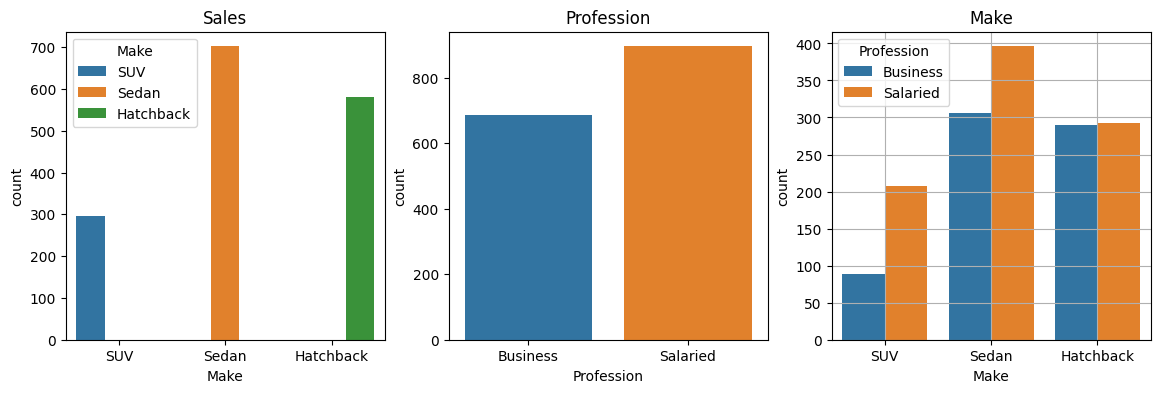

In [ ]:
#We can plot a graph to determine this-
plt.figure(figsize=(14,4))
plt.subplot(1,3,1)
plt.title("Sales")
sns.countplot(DF1, x='Make',hue='Make')
plt.subplot(1,3,2)
plt.title("Profession")
sns.countplot(DF1,x='Profession')
plt.subplot(1,3,3)
plt.title("Make")
sns.countplot(DF1,x='Make',hue='Profession')
plt.grid(True)
plt.show()

We can see from the above data that Sales of "Sedan" is more person wise with more person in "Salaried" category and when we look into the above plots from "Profession" perspective, clearly salaried person tends more towards "Sedan" than other automobiles.

3. What evidence or data supports Sheldon Cooper's claim that a salaried male is an easier target for a SUV sale over a Sedan sale?

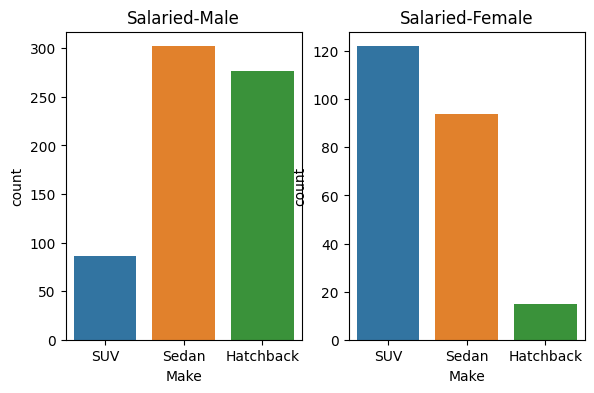

In [ ]:
df_sal_male= DF1[(DF1['Profession']=='Salaried') & (DF1['Gender']=='Male')]
df_sal_female=DF1[(DF1['Profession']=='Salaried') & (DF1['Gender']=='Female')]
df_bus_Gen=DF1[(DF1['Profession']=='Business') & (DF1['Gender']=='Male')]
plt.figure(figsize=(14,4))
plt.subplot(1,4,1)
plt.title("Salaried-Male")
sns.countplot(df_sal_male, x='Make')
plt.subplot(1,4,2)
plt.title('Salaried-Female')
sns.countplot(df_sal_female, x='Make')
plt.show()

4. How does the the amount spent on purchasing automobiles vary by gender?

Mean Gender
Female    47543.026706
Male      32361.736334
Name: Price, dtype: float64 

 Median Gender
Female    49000.0
Male      29000.0
Name: Price, dtype: float64


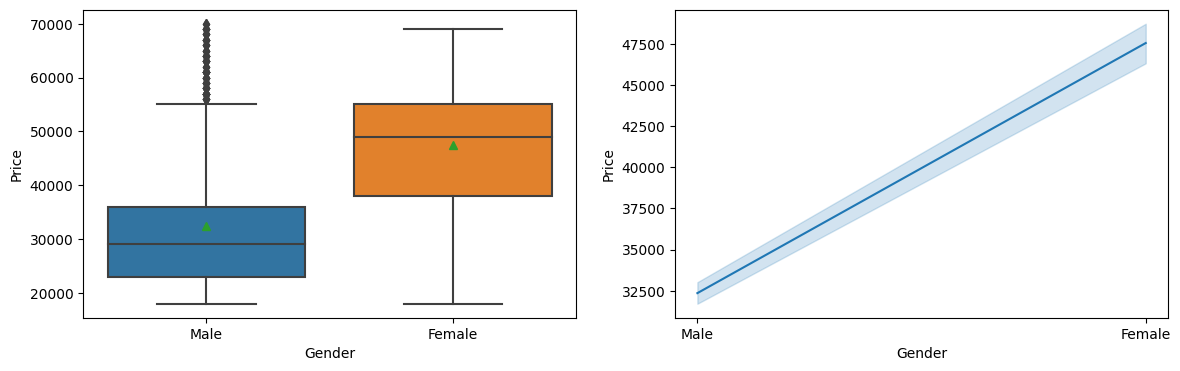

In [ ]:
print('Mean', DF1.groupby(by = DF1['Gender']).Price.mean(), '\n\n', 'Median',
     DF1.groupby(by=DF1['Gender']).Price.median())
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.boxplot(data=DF1,x='Gender',y='Price',showmeans=True)
plt.subplot(1,2,2)
sns.lineplot(data=DF1, x='Gender', y='Price')
plt.show();


5. How much money was spent on purchasing automobiles by individuals who took a personal loan?

Total amount spent by individuals on automobiles who took PL is Rs. 27290000

 Mean Personal_loan
No     36742.712294
Yes    34457.070707
Name: Price, dtype: float64 

 Median Personal_loan
No     32000.0
Yes    31000.0
Name: Price, dtype: float64


<Axes: xlabel='Personal_loan', ylabel='Price'>

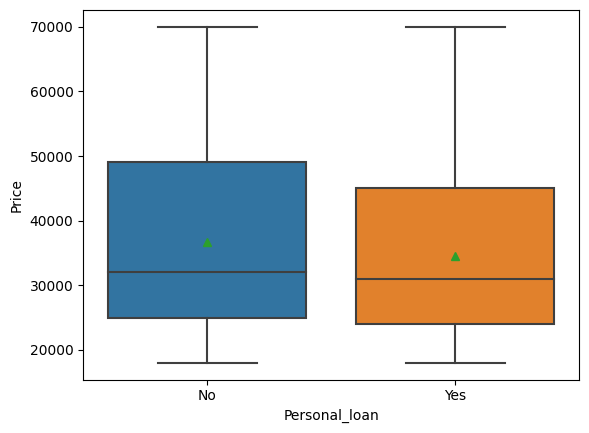

In [ ]:
df_PL= DF1[(DF1['Personal_loan']=='Yes')]
print('Total amount spent by individuals on automobiles who took PL is Rs.', df_PL.sum()['Price'])
('\n')
print('\n','Mean', DF1.groupby(by = DF1['Personal_loan']).Price.mean(), '\n\n', 'Median',
     DF1.groupby(by=DF1['Personal_loan']).Price.median())
sns.boxplot(data=DF1,x='Personal_loan',y='Price',showmeans=True)

6. How does having a working partner influence the purchase of higher-priced cars?

Partner_working
No     36000.000000
Yes    35267.281106
Name: Price, dtype: float64 
 Partner_working
No     31000.0
Yes    31000.0
Name: Price, dtype: float64


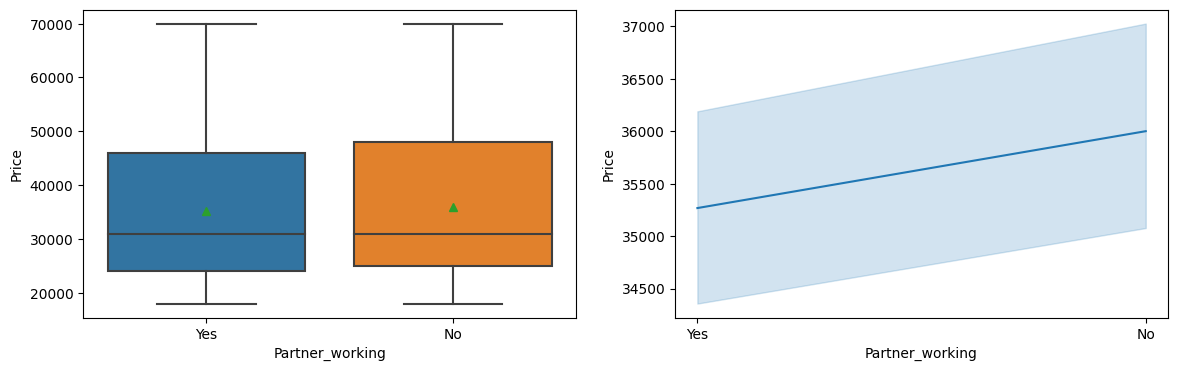

In [ ]:
print(DF1.groupby(by = DF1['Partner_working']).Price.mean(), '\n',
DF1.groupby(by = DF1['Partner_working']).Price.median())
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.boxplot(data=DF1,x='Partner_working',y='Price',showmeans=True);
plt.subplot(1,2,2)
sns.lineplot(data=DF1, x='Partner_working', y='Price');
plt.show();


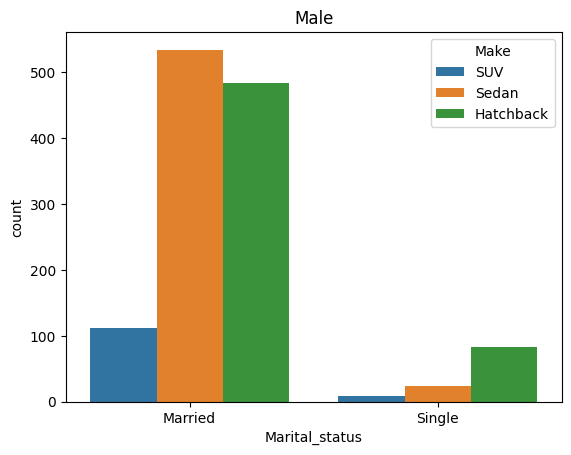

In [ ]:
plt.title("Male")
sns.countplot(data=df_male, x='Marital_status', hue='Make')
plt.show()

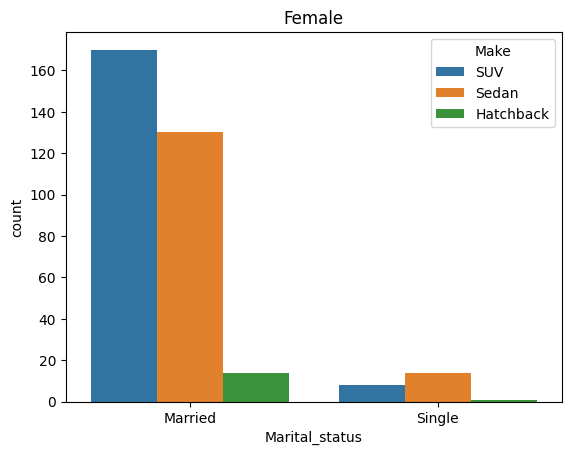

In [ ]:
plt.title("Female")
sns.countplot(data = df_female, x = 'Marital_status', hue = 'Make')
plt.show()

**Problem 2 - Framing Analytics Problem**

Analyse the dataset and list down the top 5 important variables, along with the business justifications

In [ ]:
DF2.head()

,userid,card_no,card_bin_no,Issuer,card_type,card_source_date,high_networth,active_30,active_60,active_90,...,bank_vintage,T+1_month_activity,T+2_month_activity,T+3_month_activity,T+6_month_activity,T+12_month_activity,Transactor_revolver,avg_spends_l3m,Occupation_at_source,cc_limit
0,1,4384 39XX XXXX XXXX,438439,Visa,edge,2019-09-29,B,0,1,1,...,27,0,0,0,0,0,T,27729,Self Employed,290000
1,2,4377 48XX XXXX XXXX,437748,Visa,prosperity,2002-10-30,A,1,1,1,...,52,0,0,0,0,0,R,280854,0,950000
2,3,4377 48XX XXXX XXXX,437748,Visa,rewards,2013-10-05,C,0,0,0,...,23,1,0,0,0,0,R,70587,Student,210000
3,4,4258 06XX XXXX XXXX,425806,Visa,indianoil,1999-06-01,E,0,1,1,...,49,0,0,1,0,0,T,9156,Self Employed,80000
4,5,4377 48XX XXXX XXXX,437748,Visa,edge,2006-06-13,B,1,1,1,...,21,1,0,0,0,0,T,38108,Salaried,220000


In [ ]:
DF2.tail()

,userid,card_no,card_bin_no,Issuer,card_type,card_source_date,high_networth,active_30,active_60,active_90,...,bank_vintage,T+1_month_activity,T+2_month_activity,T+3_month_activity,T+6_month_activity,T+12_month_activity,Transactor_revolver,avg_spends_l3m,Occupation_at_source,cc_limit
8443,8444,4262 41XX XXXX XXXX,426241,Visa,chartered,2010-01-10,A,1,1,1,...,47,0,0,0,0,0,T,108713,0,970000
8444,8445,37691 6XXXX XXXXX,376916,Amex,centurion,2006-07-19,A,0,1,1,...,52,0,0,0,0,0,T,42369,Salaried,200000
8445,8446,4375 51XX XXXX XXXX,437551,Visa,rewards,2006-02-15,D,0,1,1,...,36,0,0,0,0,0,T,8459,Retired,90000
8446,8447,4477 47XX XXXX XXXX,447747,Visa,indianoil,2003-11-06,C,0,0,0,...,54,1,0,0,0,0,T,57100,Salaried,210000
8447,8448,4262 41XX XXXX XXXX,426241,Visa,rewards,2013-01-13,D,0,1,1,...,37,0,0,0,0,0,T,45244,Retired,130000


In [ ]:
print('No. of Rows:',DF2.shape[0])
print('No. of Columns:',DF2.shape[1])

No. of Rows: 8448
No. of Columns: 28


In [ ]:
DF2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8448 entries, 0 to 8447
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   userid                   8448 non-null   int64         
 1   card_no                  8448 non-null   object        
 2   card_bin_no              8448 non-null   int64         
 3   Issuer                   8448 non-null   object        
 4   card_type                8448 non-null   object        
 5   card_source_date         8448 non-null   datetime64[ns]
 6   high_networth            8448 non-null   object        
 7   active_30                8448 non-null   int64         
 8   active_60                8448 non-null   int64         
 9   active_90                8448 non-null   int64         
 10  cc_active30              8448 non-null   int64         
 11  cc_active60              8448 non-null   int64         
 12  cc_active90              8448 non-

In [ ]:
DF2.describe(include='all').T

<ipython-input-460-399102477453>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  DF2.describe(include='all').T


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
userid,8448.0,NaN,NaN,NaN,NaT,NaT,4224.5,2438.87187,1.0,2112.75,4224.5,6336.25,8448.0
card_no,8448,11,4262 41XX XXXX XXXX,2084,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
card_bin_no,8448.0,NaN,NaN,NaN,NaT,NaT,436747.044508,30489.752417,376916.0,426241.0,437551.0,438439.0,524178.0
Issuer,8448,3,Visa,7279,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
card_type,8448,15,rewards,1502,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
card_source_date,8448,5186,2008-12-04 00:00:00,6,1998-07-24,2020-06-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
high_networth,8448,5,A,1740,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
active_30,8448.0,NaN,NaN,NaN,NaT,NaT,0.292377,0.454881,0.0,0.0,0.0,1.0,1.0
active_60,8448.0,NaN,NaN,NaN,NaT,NaT,0.494792,0.500002,0.0,0.0,0.0,1.0,1.0
active_90,8448.0,NaN,NaN,NaN,NaT,NaT,0.642045,0.479427,0.0,0.0,1.0,1.0,1.0
